# Module 4 & 5 - Classification

## Notes
- 1 December 2021: Ran successfully most cases.

In [159]:
import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus 

from sklearn import tree
from scipy import stats
from IPython.display import Image

Gini coefficient @ $v_{i}$:

Gini coefficient $\in [0,1]$

$G(v_{i}) = 1 - \displaystyle \sum_{j=1}^k p_{j}^{2}$

$Overall G = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}G(v_{i})}{n}$

Entropy coefficent $\in [0, log_{2}k]$

$E(v_{i}) = - \displaystyle \sum_{j=1}^k p_{j}log_{2}(p_{j})$

$Overall E = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}E(v_{i})}{n}$

Reference: Shannon Entropy

$H(X) = - \displaystyle \sum_{i=1}^n P(x_{i})log_{2}P(x_{i})$

- Both Gini & Entropy have strongest discriminant power when they approach zero (0).

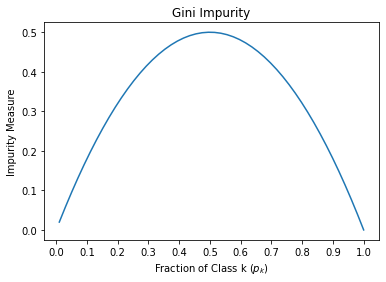

In [160]:
#A figure is created to show Gini ımpurity measures 
def plot_gini(x):
    plt.figure()
    # x = np.linspace(0.01,1)
    y = 1 - (x*x) - (1-x)*(1-x) 
    plt.plot(x,y)
    plt.title('Gini Impurity')
    plt.xlabel("Fraction of Class k ($p_k$)")
    plt.ylabel("Impurity Measure")
    plt.xticks(np.arange(0,1.1,0.1))

    plt.show()

plot_gini(np.linspace(0.01,1))    

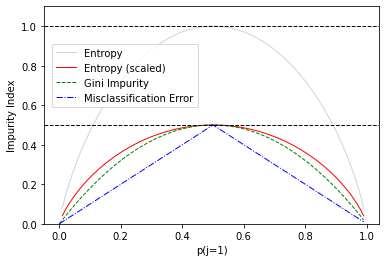

In [161]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

# Excersise code begins ...

In [162]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    gini = 1
    
    if len(value_counts) == n:
        return 0
    
    for key in value_counts.keys():
        pj = value_counts[key]/n
        gini -= (pj)**2    
        
    return gini

def entropy(value_counts):
    entropy = 0
    for key in value_counts.keys():
        pj = value_counts[key]/n
        entropy += pj*math.log(pj,2)
    return -entropy

In [163]:
def get_gini_by_classes(dfs, feat_name, feat_unique_values, n):
    props = {}
    counts = {}
    for value in feat_unique_values:
        counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in props:
                props[value] = []
            props[value].append(len(df[df[feat_name] == value]))
            counts[value] += len(df[df[feat_name] == value])
            
    ginis = {}
    overall_g = 0
    for key in props:
        g = 1
        for val in props[key]:
            pj = val/sum(props[key])
            g -= pj**2
        ginis[key] = g
        ni = counts[key]
        overall_g += g*ni/n
    return ginis, overall_g

import math

def get_entropy(df, label_name):
    
    label_values = df[label_name].unique()
    counts = {}
    n = len(df)
    
    for val in label_values:
        counts[val] = len(df[df[label_name] == val])
#     print(label_values)
#     print(counts)
    
    e = 0
    for key in counts:
        val = counts[key]
        pj = val/n
        e -= pj*math.log(pj,2)
#     print(round(e,4))
    
    return e, counts

# information gain
def get_ig(df, label_name, feat_name):
    e, counts = get_entropy(df, label_name)
    feat_unique_values = df[feat_name].unique()    
    
    counts = {}
    n = len(df)
    
    for val in feat_values:
        counts[val] = len(df[df[feat_name] == val])
    
    dfs = {}
    for cls in classes:
        dfs[cls] = df[df[label_name] == cls]
    feat_props = {}
    feat_counts = {}
    for value in feat_unique_values:
        feat_counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in feat_props:
                feat_props[value] = []
            feat_props[value].append(len(df[df[feat_name] == value]))
            feat_counts[value] += len(df[df[feat_name] == value])
    
    print('feat_unique_values', feat_unique_values)
    print('feat_counts', feat_counts)
    e_split = 0
    for key in feat_counts:
        pi = feat_counts[key]/n
        ei = 0
        for count in feat_props[key]:                
            pj = count/sum(feat_props[key])
            if pj > 0:
                ei -= pj*math.log(pj,2)
            
        e_split += pi*ei
        print(f'{feat_counts[key]}: {e_split}')
    
    return e_split, e - e_split



In [336]:
EX_3_2     = '../data/ex-3_2.csv'
EX_3_3     = '../data/ex-3_3.csv'
EX_3_6     = '../data/ex-3_6.csv'
EX_3_EXTRA = '../data/ex-3_extra.csv'
VERTEBRATE = '../data/vertebrate.csv'
WEB_ROBOT  = '../data/web-robot-detection.csv'
SOC_NET    = '../data/Social_Network_Ads.csv'

filename = EX_3_2
label_name = 'Class'
dropped_features = ['CustomerID']

filename = EX_3_3
label_name = 'Target_Class'
dropped_features = ['Instance', 'a3']

# *** This is a more complex case where you have 2 labels/dependent variables. ***
# *** Don't run decision tree on it as of yet ***
# filename = EX_3_6
# label_name = 'C1'
# dropped_features = []

# filename = EX_3_EXTRA
# label_name = 'default'
# dropped_features = []

# filename = VERTEBRATE
# label_name = 'Class'
# dropped_features = ['Name']

filename = WEB_ROBOT
label_name = 'class'
dropped_features = []

# filename = SOC_NET
# label_name = 'Purchased'
# dropped_features = ['User_ID']

df = pd.read_csv(filename)

df.style

,A,B,C,D,class
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,0
9,1,0,0,1,0


## *** Data Mapping for some data sets ***
### Begins

In [337]:
if filename == EX_3_2:
    gender = {'M': 1, 'F': 2}
    car_type = {'Family': 1, 'Sports': 2, 'Luxury': 3}
    shirt_size = {'Small': 1, 'Medium':2, 'Large': 3, 'Extra Large': 4} # Preserving the order: Small, Medium, Large, Extra Lage ...
    df = df.replace({'Gender': gender}).replace({'Car Type': car_type}).replace({'Shirt Size': shirt_size})
elif filename == EX_3_3:
    a1 = {'F': 0, 'T': 1}
    a2 = {'F': 0, 'T': 1}
    df = df.replace({'a1': a1}).replace({'a2': a2})
elif filename == EX_3_EXTRA:
    age = {'youth': 1, 'middle_age': 2, 'senior': 3}
    income = {'low': 1, 'medium': 2, 'high': 3}
    student = {'no': 0, 'yes': 1}
    credit_rate = {'fair': 1, 'excellent': 2}
    df = df.replace({'age': age}).replace({'income': income}).replace({'student': student}).replace({'credit_rate':credit_rate})
elif filename == WEB_ROBOT:
    class_values = {0: '0', 1:'1'}
    df = df.replace({'class': class_values})
elif filename == SOC_NET:
    gender = {'Male': 1, 'Female': 2}
    purchased = {0:'0', 1:'1'}
    df = df.replace({'Gender':gender}).replace({'Purchased': purchased})
df

,A,B,C,D,class
0,0,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,1,1
4,0,1,0,0,0
5,0,1,0,1,0
6,0,1,1,0,0
7,0,1,1,1,1
8,1,0,0,0,0
9,1,0,0,1,0


## *** Data Mapping***
### Ends

## *** FOR vertebrate.csv ONLY ***
### Begins

In [338]:
## For data set `vertebrate.csv`, we are binarization the columns as follows:
if filename == VERTEBRATE:
    df_old = df.copy(deep=True)
    df[label_name] = df[label_name].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
    df

In [339]:
if filename == VERTEBRATE:
    pd.crosstab([df['Warm-blooded'],df['Gives Birth']],df[label_name])

## *** FOR vertebrate.csv ONLY ***
### Ends

## Compute Gini Index, Entropy & Information Gain (IG)

In [340]:
## Splitting data set into multiple data sets by values of the `label`.

classes = df[label_name].unique()
feat_list = df.columns.to_list()
feat_list.remove(label_name)

n = len(df)
dfs_by_classes = {}
for cls in classes:
    dfs_by_classes[cls] = df[df[label_name] == cls]

df_gini_output = pd.DataFrame()
dfs = []
for feat_name in feat_list:
    print(f'\n***{feat_name}***\n')
    feat_values = df[feat_name].unique()
    ginis, overall_g = get_gini_by_classes(dfs_by_classes, feat_name, feat_values, n)
    print('ginis:', ginis)
    print('overall G:', overall_g)
    dfs.append(pd.DataFrame([feat_name, ginis, overall_g]).transpose())    

df_gini_output = pd.concat(dfs)
df_gini_output.columns = ['Feature', 'G(vi)', 'G(S)']
display(df_gini_output)


***A***

ginis: {0: 0.375, 1: 0.46875}
overall G: 0.421875

***B***

ginis: {0: 0.375, 1: 0.46875}
overall G: 0.421875

***C***

ginis: {0: 0.375, 1: 0.46875}
overall G: 0.421875

***D***

ginis: {0: 0.375, 1: 0.46875}
overall G: 0.421875


,Feature,G(vi),G(S)
0,A,"{0: 0.375, 1: 0.46875}",0.421875
0,B,"{0: 0.375, 1: 0.46875}",0.421875
0,C,"{0: 0.375, 1: 0.46875}",0.421875
0,D,"{0: 0.375, 1: 0.46875}",0.421875


In [341]:
e, counts = get_entropy(df, label_name)
print(f'E(S) = {round(e,4)}')
print('counts:', counts)


E(S) = 0.9887
counts: {'0': 9, '1': 7}


In [342]:
for feat_name in df_gini_output['Feature']:
    print (f'\n---> IG for {feat_name}')
    e_split, ig = get_ig(df, label_name, feat_name)
    print(f'{feat_name}: e_split = {round(e_split,4)} & ig = {round(ig,4)}')
    



---> IG for A
feat_unique_values [0 1]
feat_counts {0: 8, 1: 8}
8: 0.4056390622295664
8: 0.8828560636920488
A: e_split = 0.8829 & ig = 0.1058

---> IG for B
feat_unique_values [0 1]
feat_counts {0: 8, 1: 8}
8: 0.4056390622295664
8: 0.8828560636920488
B: e_split = 0.8829 & ig = 0.1058

---> IG for C
feat_unique_values [0 1]
feat_counts {0: 8, 1: 8}
8: 0.4056390622295664
8: 0.8828560636920488
C: e_split = 0.8829 & ig = 0.1058

---> IG for D
feat_unique_values [0 1]
feat_counts {0: 8, 1: 8}
8: 0.4056390622295664
8: 0.8828560636920488
D: e_split = 0.8829 & ig = 0.1058


# Decision Trees ***
## Gini Coefficient

In [343]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)
    
depth = 3
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

In [344]:
class_names = df[label_name].unique()
class_names

array(['0', '1'], dtype=object)

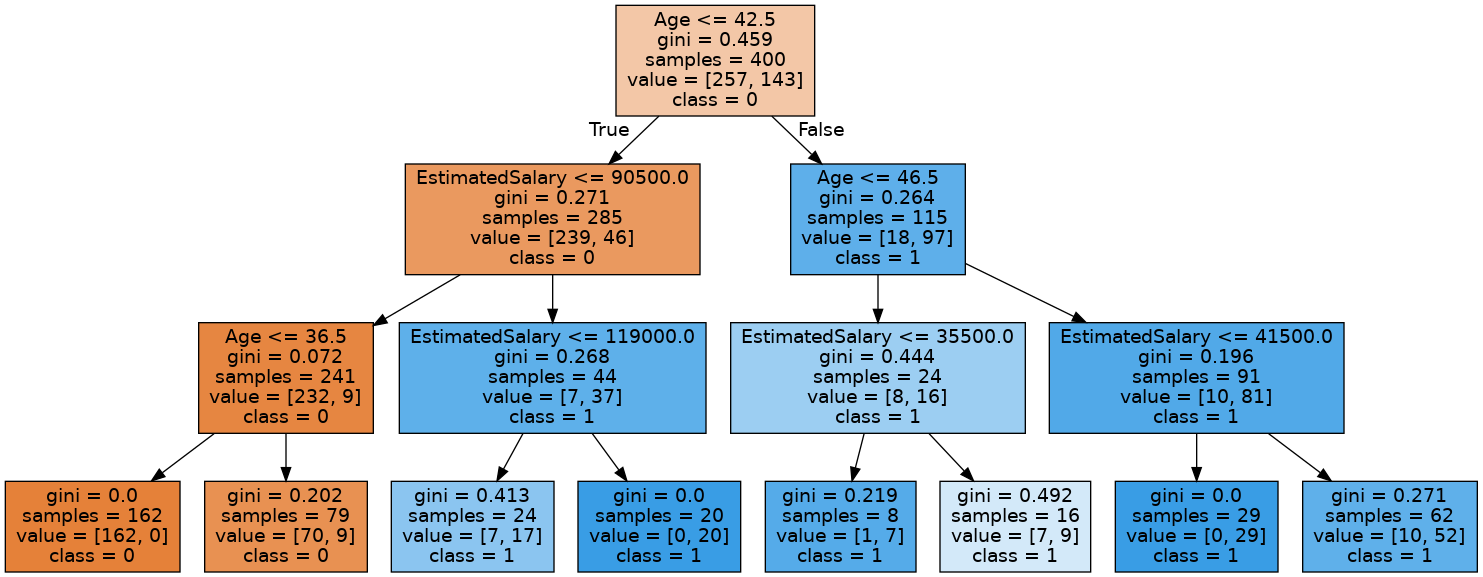

In [319]:
class_names = df[label_name].unique()
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Discussion
From the decision tree above, one can conclude that the error rate for a1 is 2/9 and a2 is 4/9 where 9 is the size of the training set. 

# Decision Tree *** for vertebrate.csv data set ***
## Gini Coefficient

In [234]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)
# display(X)
# display(Y)

## Graph the Tree


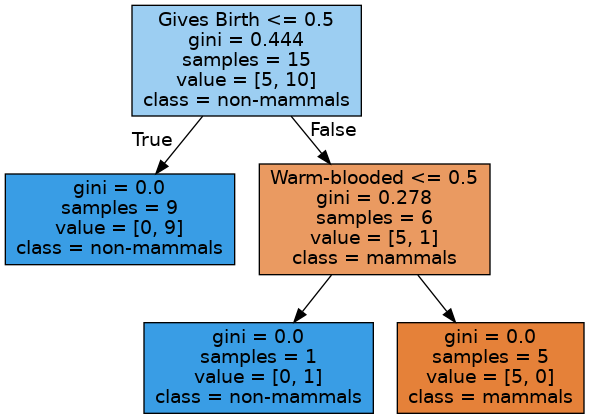

In [235]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Entropy

In [236]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

## Graph the tree

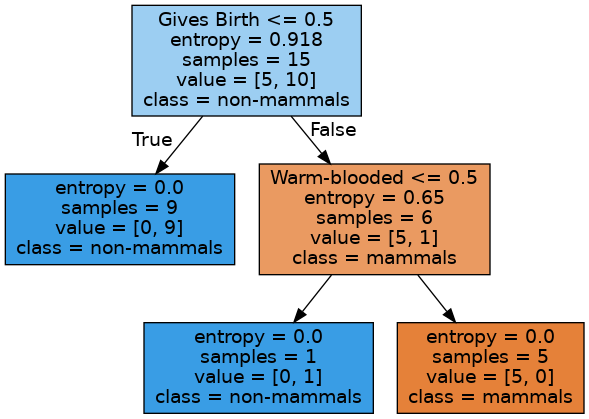

In [237]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Testing the classifier


In [238]:
test_data = []
if filename == VERTEBRATE:    
    test_data = [['gila monster',0,0,0,0,1,1,'non-mammals'],
               ['platypus',1,0,0,0,1,1,'mammals'],
               ['owl',1,0,0,1,1,0,'non-mammals'],
               ['dolphin',1,1,1,0,0,0,'mammals']]
    df_test_data = pd.DataFrame(test_data, columns=df.columns)
    df_test_data

## Making Prediction on test data.

In [239]:
if test_data:
    testY = df_test_data[label_name]
    testX = df_test_data.drop(dropped_features + [label_name], axis=1)
    predY = clf.predict(testX)
    predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
    predictions

In [240]:
from sklearn.metrics import accuracy_score

if test_data:
    print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


# Scratched papers

## Reference
`https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py`
    

In [320]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [321]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [333]:
len(iris['data'])

150

In [323]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )


The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


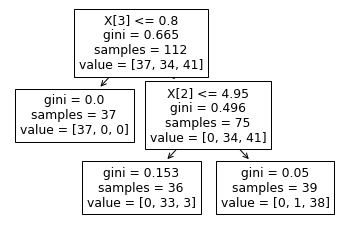

In [324]:
tree.plot_tree(clf)
plt.show()

In [325]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


In [326]:
sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.


## Section 3.5.3 Web Robot

In [335]:
err_tl = 4/24 + 0.5*7/24
err_tl

0.3125